## Final Project - Amazon Ranking Analysis
Group Member:-
1. Abdullah Ghazali
1. Abdullah Amir Ikram
1. Azri Soufi

In [6]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
#read csv file
amazon = pd.read_csv('amazon.csv')
amazon.head()

,Index,ProductName,ScrapeDate,ScrapedIndex,ScrapedIndexTrueRank,CorrectedIndexTrueRank,ScrapedIndexPrice,CorrectedPrice,ScrapedIndexVendor,ScrapedIndexVendorType,BBScrapedPrice,BBVendorType,BBVendor,BBCorrectedPrice
0,0,#1 BEST Probiotic Supplement - 60 Day Supply w...,2016-06-14,2,2,1,20.99,20.99,Supplement Warriors,Other,-1.0,FBA,Sold by Sharp Nutrition and Fulfilled by Amazon.,25.02
1,1,#1 BEST Probiotic Supplement - 60 Day Supply w...,2016-06-14,1,1,2,19.99,25.02,Sharp Nutrition,FBA,-1.0,FBA,Sold by Sharp Nutrition and Fulfilled by Amazon.,25.02
2,2,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2016-06-27,1,1,1,3.96,3.96,speedy tests,Other,4.9,FBA,Sold by Michael Minyety and Fulfilled by Amazon.,9.97
3,3,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2016-06-27,2,1,1,3.96,3.96,Drug Abuse Control,Other,4.9,FBA,Sold by Michael Minyety and Fulfilled by Amazon.,9.97
4,4,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2016-06-27,3,1,1,3.96,3.96,Lowest Priced Tests,Other,4.9,FBA,Sold by Michael Minyety and Fulfilled by Amazon.,9.97


In [8]:
#Count the numbers of rows and columns
amazon.shape

(6973, 14)

In [9]:
amazon.dtypes

Index                       int64
ProductName                object
ScrapeDate                 object
ScrapedIndex                int64
ScrapedIndexTrueRank        int64
CorrectedIndexTrueRank      int64
ScrapedIndexPrice         float64
CorrectedPrice            float64
ScrapedIndexVendor         object
ScrapedIndexVendorType     object
BBScrapedPrice            float64
BBVendorType               object
BBVendor                   object
BBCorrectedPrice          float64
dtype: object

In [10]:
amazon.describe()

,Index,ScrapedIndex,ScrapedIndexTrueRank,CorrectedIndexTrueRank,ScrapedIndexPrice,CorrectedPrice,BBScrapedPrice,BBCorrectedPrice
count,6973.000000,6973.000000,6973.000000,6973.000000,6973.000000,6973.000000,6973.000000,6973.000000
mean,3486.000000,25.041876,22.730962,21.559300,54.904896,55.567631,36.295817,45.827961
std,2013.076046,23.618871,20.520442,19.154709,74.293356,74.476092,61.838063,63.889925
min,0.000000,1.000000,1.000000,1.000000,2.380000,2.380000,-1.000000,0.000000
25%,1743.000000,8.000000,7.000000,7.000000,19.530000,20.010000,8.990000,15.790000
50%,3486.000000,17.000000,16.000000,16.000000,31.900000,32.080000,14.940000,23.340000
75%,5229.000000,35.000000,33.000000,31.000000,55.890000,56.100000,36.990000,47.920000
max,6972.000000,162.000000,113.000000,107.000000,931.800000,931.800000,698.000000,706.110000


In [11]:
#check missing value
amazon.isnull().sum()

Index                       0
ProductName                 0
ScrapeDate                  0
ScrapedIndex                0
ScrapedIndexTrueRank        0
CorrectedIndexTrueRank      0
ScrapedIndexPrice           0
CorrectedPrice              0
ScrapedIndexVendor          0
ScrapedIndexVendorType      0
BBScrapedPrice              0
BBVendorType                0
BBVendor                  164
BBCorrectedPrice            0
dtype: int64

In [12]:
amazon[amazon.BBVendor.isnull()]
#View the missing value 

,Index,ProductName,ScrapeDate,ScrapedIndex,ScrapedIndexTrueRank,CorrectedIndexTrueRank,ScrapedIndexPrice,CorrectedPrice,ScrapedIndexVendor,ScrapedIndexVendorType,BBScrapedPrice,BBVendorType,BBVendor,BBCorrectedPrice
19,19,2wayz FULL METAL BODY Garden Hose Splitter | Y...,2016-06-20,1,1,1,40.00,40.00,Irtenzia,Other,-1.0,O,NaN,9.97
20,20,2wayz FULL METAL BODY Garden Hose Splitter | Y...,2016-06-20,2,2,2,54.94,54.94,Mild Shop,Other,-1.0,O,NaN,9.97
1367,1367,Bushnell Powerview 7-15X25 Compact Zoom Binocular,2016-08-30,1,1,1,53.04,53.04,PORTABLE GUY,Other,-1.0,O,NaN,165.50
1368,1368,Bushnell Powerview 7-15X25 Compact Zoom Binocular,2016-08-30,2,2,2,54.41,54.41,TheXBOXking,Other,-1.0,O,NaN,165.50
1369,1369,Bushnell Powerview 7-15X25 Compact Zoom Binocular,2016-08-30,3,3,3,54.69,54.69,WebyShops,Other,-1.0,O,NaN,165.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5658,5658,"Regalo Swing Down Bedrail, White",2016-06-27,20,19,19,44.96,44.96,Mild Shop,Other,-1.0,O,NaN,35.34
5659,5659,"Regalo Swing Down Bedrail, White",2016-06-27,21,20,20,47.79,47.79,MidwestProductsDepot,Other,-1.0,O,NaN,35.34
5660,5660,"Regalo Swing Down Bedrail, White",2016-06-27,22,21,21,47.90,47.90,Fairy Bless,Other,-1.0,O,NaN,35.34
5661,5661,"Regalo Swing Down Bedrail, White",2016-06-27,23,22,22,53.96,53.96,RevoSync,Other,-1.0,O,NaN,35.34


In [13]:
#View colleration of each field in the data set
amazon.corr()

,Index,ScrapedIndex,ScrapedIndexTrueRank,CorrectedIndexTrueRank,ScrapedIndexPrice,CorrectedPrice,BBScrapedPrice,BBCorrectedPrice
Index,1.000000,-0.041440,-0.041483,-0.052926,-0.081656,-0.081318,-0.062443,-0.072889
ScrapedIndex,-0.041440,1.000000,0.986999,0.861782,0.033243,0.026051,-0.040437,-0.051168
ScrapedIndexTrueRank,-0.041483,0.986999,1.000000,0.897189,0.033702,0.026145,-0.048845,-0.059107
CorrectedIndexTrueRank,-0.052926,0.861782,0.897189,1.000000,0.046877,0.041911,-0.047200,-0.057569
ScrapedIndexPrice,-0.081656,0.033243,0.033702,0.046877,1.000000,0.999510,0.948636,0.967543
CorrectedPrice,-0.081318,0.026051,0.026145,0.041911,0.999510,1.000000,0.949922,0.968685
BBScrapedPrice,-0.062443,-0.040437,-0.048845,-0.047200,0.948636,0.949922,1.000000,0.970268
BBCorrectedPrice,-0.072889,-0.051168,-0.059107,-0.057569,0.967543,0.968685,0.970268,1.000000


Since, 'Index' column does not give us any impact on our analysis we can remove it from the data frame

In [14]:
# remove Index column
amazon.drop('Index', axis = 1, inplace = True)

In [15]:
amazon.shape

(6973, 13)

In the process below, we change object data type into 'int' data type since Machine Learning Models can not work on categorical variables in the form of strings, so we need to change it into numerical form.

In [16]:
amazon.groupby('BBVendorType').BBVendor.count()

BBVendorType
Amazon    5788
FBA        470
O          551
Name: BBVendor, dtype: int64

In [17]:
amazon.groupby('ScrapedIndexVendorType').ScrapedIndexVendorType.count()

ScrapedIndexVendorType
Amazon     192
FBA        409
Other     6372
Name: ScrapedIndexVendorType, dtype: int64

In [18]:
amazon['BBVendorType'] = amazon.BBVendorType.map({'Amazon':1, 'FBA':2, 'O': 3})

In [19]:
amazon.head()

,ProductName,ScrapeDate,ScrapedIndex,ScrapedIndexTrueRank,CorrectedIndexTrueRank,ScrapedIndexPrice,CorrectedPrice,ScrapedIndexVendor,ScrapedIndexVendorType,BBScrapedPrice,BBVendorType,BBVendor,BBCorrectedPrice
0,#1 BEST Probiotic Supplement - 60 Day Supply w...,2016-06-14,2,2,1,20.99,20.99,Supplement Warriors,Other,-1.0,2,Sold by Sharp Nutrition and Fulfilled by Amazon.,25.02
1,#1 BEST Probiotic Supplement - 60 Day Supply w...,2016-06-14,1,1,2,19.99,25.02,Sharp Nutrition,FBA,-1.0,2,Sold by Sharp Nutrition and Fulfilled by Amazon.,25.02
2,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2016-06-27,1,1,1,3.96,3.96,speedy tests,Other,4.9,2,Sold by Michael Minyety and Fulfilled by Amazon.,9.97
3,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2016-06-27,2,1,1,3.96,3.96,Drug Abuse Control,Other,4.9,2,Sold by Michael Minyety and Fulfilled by Amazon.,9.97
4,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2016-06-27,3,1,1,3.96,3.96,Lowest Priced Tests,Other,4.9,2,Sold by Michael Minyety and Fulfilled by Amazon.,9.97


In [20]:
amazon['ScrapedIndexVendorType'] = amazon.ScrapedIndexVendorType.map({'Amazon':1, 'FBA':2, 'Other': 3})

In [21]:
amazon.head()

,ProductName,ScrapeDate,ScrapedIndex,ScrapedIndexTrueRank,CorrectedIndexTrueRank,ScrapedIndexPrice,CorrectedPrice,ScrapedIndexVendor,ScrapedIndexVendorType,BBScrapedPrice,BBVendorType,BBVendor,BBCorrectedPrice
0,#1 BEST Probiotic Supplement - 60 Day Supply w...,2016-06-14,2,2,1,20.99,20.99,Supplement Warriors,3,-1.0,2,Sold by Sharp Nutrition and Fulfilled by Amazon.,25.02
1,#1 BEST Probiotic Supplement - 60 Day Supply w...,2016-06-14,1,1,2,19.99,25.02,Sharp Nutrition,2,-1.0,2,Sold by Sharp Nutrition and Fulfilled by Amazon.,25.02
2,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2016-06-27,1,1,1,3.96,3.96,speedy tests,3,4.9,2,Sold by Michael Minyety and Fulfilled by Amazon.,9.97
3,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2016-06-27,2,1,1,3.96,3.96,Drug Abuse Control,3,4.9,2,Sold by Michael Minyety and Fulfilled by Amazon.,9.97
4,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2016-06-27,3,1,1,3.96,3.96,Lowest Priced Tests,3,4.9,2,Sold by Michael Minyety and Fulfilled by Amazon.,9.97


<AxesSubplot:>

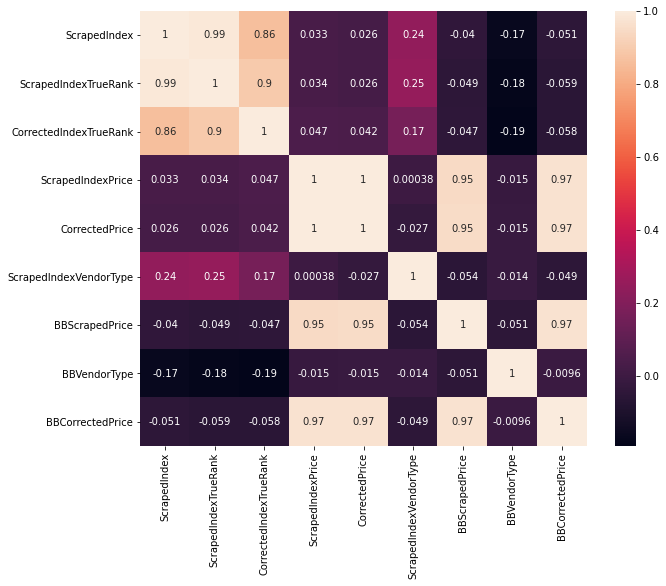

In [22]:
plt.subplots(figsize=(10,8))
sns.heatmap(amazon.corr(), annot=True,)
#To visulaise the correlation among the header.
#The darkest color has lowest to none colleration where the brightest has highest colleration.

From the heatmap above we can conclude that:
1) 'Scraped Index Price and Corrected Price' , 'BB Scraped Index Price and BB Corrected Price' are the highest correlated.
2) The lowest collerated data is at -0.17 which compare the data between 'BB Vendor type and Scraped Index'

For next step, we want to analyse more relationship among all variable. We want to handle missing and duplicate value. Then, we want to perform machine learning to predict the product price